In [1]:
import pandas as pd
import glob
import os

# Read input data

In [2]:
review_df = pd.DataFrame()
genre_df = pd.DataFrame()

# Read all CSV files and store them in a list
csv_files = glob.glob('2_reviews_per_movie_raw/*.csv')
review_dataframes = []

In [3]:
# Iterate through each file and read it into a DataFrame
for file in csv_files:
    review_df = pd.read_csv(file)
    review_dataframes.append(review_df)
    # Extract movie name and year release from the file name
    movie_name = os.path.basename(file)[:-8]
    year_release = os.path.basename(file)[-8:-4]  
    # Add movie_name and year_release columns to the DataFrame
    review_df['movie_name'] = movie_name
    review_df['year_release'] = year_release
    print(movie_name, year_release)
    review_dataframes.append(review_df)

10 Cloverfield Lane  2016
12 Strong  2018
3 Idiots  2009
The Dark Knight  2008
The Dark Knight Rises  2012


In [4]:
# Combine all DataFrames into a single DataFrame
review_df = pd.concat(review_dataframes, ignore_index=True)

# Basic EDA

In [5]:
# Perform EDA on the combined DataFrame
# Example EDA tasks
print("Shape of the combined DataFrame:", review_df.shape)
print("Columns in the combined DataFrame:", review_df.columns)
print("Sample records:")
print(review_df.head())
print("Summary statistics:")
print(review_df.describe())
# Add more EDA tasks as per your requirements


Shape of the combined DataFrame: (22770, 9)
Columns in the combined DataFrame: Index(['username', 'rating', 'helpful', 'total', 'date', 'title', 'review',
       'movie_name', 'year_release'],
      dtype='object')
Sample records:
        username rating  helpful  total             date  \
0  Imme-van-Gorp      7      102    123  30 January 2019   
1  sonofocelot-1      5      385    500      10 May 2016   
2        mhodaee      5      110    143    4 August 2017   
3      fil-nik09      5       73    100   5 October 2016   
4      DVR_Brale      7       42     56     27 July 2016   

                                               title  \
0   Unfortunately the ending ruined an otherwise ...   
1                        ...oh dear Abrams. Again.\n   
2   Fantastic, gripping, thoroughly enjoyable, un...   
3                                          Hmmm...\n   
4   Slow building & plot alternating claustrophob...   

                                              review            movie_n

In [6]:
print(review_df.head(5).to_string(index=False))

     username rating  helpful  total            date                                                                                title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [7]:
# Read all genre files and store them in a list
genre_files = glob.glob('1_movies_per_genre/*.csv')
genre_dataframes = []

In [8]:
# Iterate through each file and read it into a DataFrame
for file in genre_files:
    genre = os.path.basename(file)[:-4]  # Extract genre from file name (excluding ".csv")
    genre_df = pd.read_csv(file)
    
    # Add "genre" column to the DataFrame and populate it with the genre
    genre_df['genre'] = genre
    
    genre_dataframes.append(genre_df)

# Combine all DataFrames into a single DataFrame
genre_df = pd.concat(genre_dataframes, ignore_index=True)
# Trim leading and trailing spaces from "movie_name" column
review_df['movie_name'] = review_df['movie_name'].str.strip()

In [9]:
print(genre_df.head(5).to_string(index=False))

                                             name  year movie_rated run_length                      genres           release_date  rating  num_raters  num_reviews                                                                       review_url  genre
                                  The Dark Knight  2008       PG-13   2h 32min      Action; Crime; Drama;      18 July 2008 (USA)     9.0     2224522         6836 https://www.imdb.com/title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey= Action
                                        Inception  2010       PG-13   2h 28min Action; Adventure; Sci-Fi;      16 July 2010 (USA)     8.8     1981675         3820 https://www.imdb.com/title/tt1375666/reviews/_ajax?ref_=undefined&paginationKey= Action
                                       The Matrix  1999           R   2h 16min            Action; Sci-Fi;     31 March 1999 (USA)     8.7     1619761         4281 https://www.imdb.com/title/tt0133093/reviews/_ajax?ref_=undefined&paginationKey= Act

In [10]:
print(genre_df.shape)
print(genre_df.describe())

(1700, 11)
              year       rating    num_raters   num_reviews
count  1700.000000  1700.000000  1.700000e+03   1700.000000
mean   2002.798235     7.457706  4.134152e+05   1003.601176
std      14.359010     0.736682  3.277902e+05   1045.584805
min    1915.000000     3.500000  1.929000e+04    102.000000
25%    1999.000000     7.000000  1.812258e+05    393.750000
50%    2006.000000     7.600000  3.445890e+05    719.500000
75%    2012.000000     8.000000  5.722170e+05   1256.500000
max    2020.000000     9.300000  2.258845e+06  10279.000000


In [11]:
# Convert the columns to be merged on to a consistent data type
review_df['year_release'] = review_df['year_release'].astype(str)
genre_df['year'] = genre_df['year'].astype(str)


In [12]:
print(review_df.head(1))

        username rating  helpful  total             date  \
0  Imme-van-Gorp      7      102    123  30 January 2019   

                                               title  \
0   Unfortunately the ending ruined an otherwise ...   

                                              review           movie_name  \
0  This movie is full of suspense. It makes you g...  10 Cloverfield Lane   

  year_release  
0         2016  


In [13]:
print(genre_df.head(1))

              name  year movie_rated run_length                  genres  \
0  The Dark Knight  2008       PG-13   2h 32min  Action; Crime; Drama;    

         release_date  rating  num_raters  num_reviews  \
0  18 July 2008 (USA)     9.0     2224522         6836   

                                          review_url   genre  
0  https://www.imdb.com/title/tt0468569/reviews/_...  Action  


# Merge input files

In [14]:
# Join the dataframes based on the specified columns
merged_df = pd.merge(review_df, genre_df, left_on=['movie_name', 'year_release'], right_on=['name', 'year'], how='inner')

# Rename the columns from "genre_df" with a prefix of "g_"
merged_df = merged_df.rename(columns=lambda x: 'g_' + x if x in genre_df.columns else x)

# Convert "rating_x" column to numeric
merged_df['rating_x'] = pd.to_numeric(merged_df['rating_x'], errors='coerce')

# Create the "rating_sentiment" column based on the rating values
merged_df['rating_sentiment'] = merged_df['rating_x'].apply(lambda x: 1 if x > 5 else 0)

columns_to_keep = ["rating_x", "title", "review", "movie_name", "year_release", "g_genre", "rating_y","rating_sentiment"]

# Retain only the desired columns
merged_df = merged_df.loc[:, columns_to_keep]

# Print the resulting merged dataframe
print(merged_df.head(1))

   rating_x                                              title  \
0       7.0   Unfortunately the ending ruined an otherwise ...   

                                              review           movie_name  \
0  This movie is full of suspense. It makes you g...  10 Cloverfield Lane   

  year_release g_genre  rating_y  rating_sentiment  
0         2016  Horror       7.2                 1  


In [15]:
merged_df.columns

Index(['rating_x', 'title', 'review', 'movie_name', 'year_release', 'g_genre',
       'rating_y', 'rating_sentiment'],
      dtype='object')

# Visualize Ratings

Summary statistics:
           rating_x
count  55156.000000
mean       8.308035
std        2.496261
min        1.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       10.000000


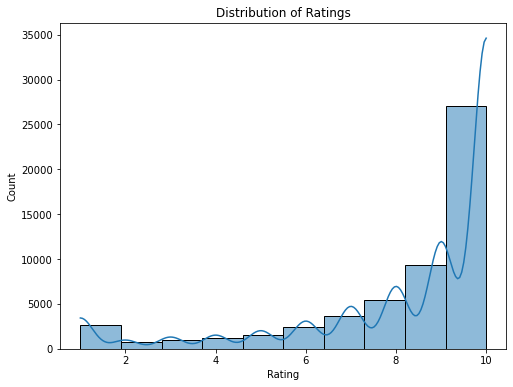

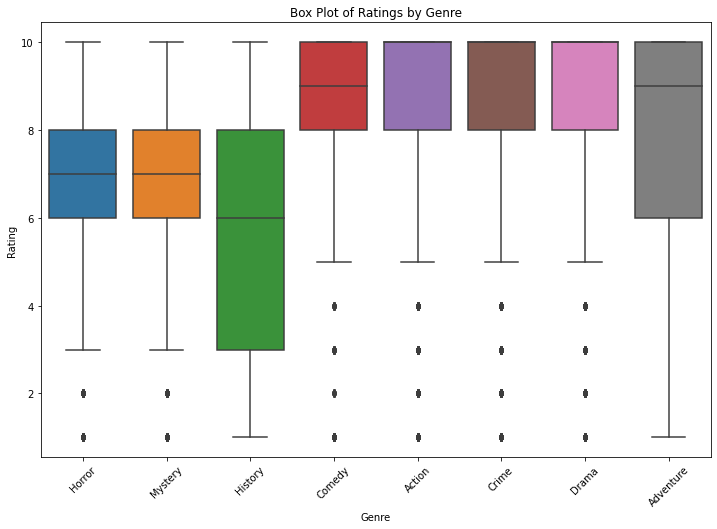

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA on the columns
# Summary statistics
print("Summary statistics:")
print(merged_df[['rating_x', 'g_genre']].describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=merged_df, x='rating_x', bins=10, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# Box plot of ratings by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df, x='g_genre', y='rating_x')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings by Genre')
plt.xticks(rotation=45)
plt.show()


# Visualize Sentiment by Genre

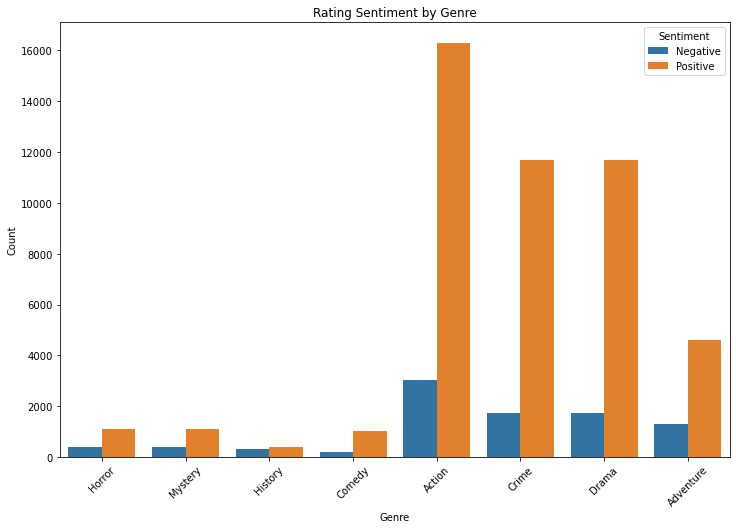

In [17]:
# Bar plot of rating sentiment by genre
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, x='g_genre', hue='rating_sentiment')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Rating Sentiment by Genre')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()

# Create pickle file using merged_df

In [18]:
import pickle

# Specify the file path for the pickle file
pickle_file_path = 'merged_df.pkl'

# Create and save the pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(merged_df, file)

In [34]:
data_list = merged_df.values.tolist()

In [39]:
print(data_list[0][6])

This movie is full of suspense. It makes you guess about what is real and what is not. It happens more than once that you have to wonder about what is the truth and who is lying.<br/><br/>Because you are just as clueless as the main character, Michelle, you really get to experience the same type of emotions and confusion as she is. This not only makes you feel closer to Michelle as a character, but also to the overall story.<br/><br/>They did, however, ruin this connection that they build over the course of the story by making this sloppy, rushed and just strange ending. If they had made a different ending, my rating could have been an 8 or maybe even a 9. Depends on how good of an ending it would have been.


In [37]:
len(data_list)

57016

In [43]:
review_list = [entry[6] for entry in data_list]

In [44]:
review_list[0]

'This movie is full of suspense. It makes you guess about what is real and what is not. It happens more than once that you have to wonder about what is the truth and who is lying.<br/><br/>Because you are just as clueless as the main character, Michelle, you really get to experience the same type of emotions and confusion as she is. This not only makes you feel closer to Michelle as a character, but also to the overall story.<br/><br/>They did, however, ruin this connection that they build over the course of the story by making this sloppy, rushed and just strange ending. If they had made a different ending, my rating could have been an 8 or maybe even a 9. Depends on how good of an ending it would have been.'

# TF-IDF and LDA for Topic Modeling

In [52]:
vocab_size = 1000

# Define additional stopwords
additional_stopwords = ['br', 'movie', 'film']

# Combine the default English stopwords with additional stopwords
stop_words = CountVectorizer(stop_words='english').get_stop_words()
stop_words = stop_words.union(additional_stopwords)

from sklearn.feature_extraction.text import CountVectorizer
# document frequency (df) means number of documents a word appears in
tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                stop_words=stop_words,
                                max_features=vocab_size)
tf = tf_vectorizer.fit_transform(review_list)

In [53]:
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tf)

LatentDirichletAllocation(random_state=0)

In [54]:
import numpy as np
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])

In [55]:
num_top_words = 20

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)

Displaying the top 20 words per topic and their probabilities within the topic...

[Topic 0]
just : 0.024179264938001384
like : 0.015246463892583903
scenes : 0.01421062525168278
time : 0.013909370323627476
really : 0.01343368018481418
batman : 0.011961804749284124
plot : 0.01086156406157233
didn : 0.010039688364467739
action : 0.00991403859007878
did : 0.00864021651806811
long : 0.00844724906170921
story : 0.00840621518799336
good : 0.00794308315640862
scene : 0.007461841412235146
felt : 0.007376984520993831
end : 0.007374978939390004
minutes : 0.006869653318313499
characters : 0.006784655517642879
way : 0.006148160502946577
hours : 0.005875662605630838

[Topic 1]
like : 0.015379027223906851
batman : 0.014685547746490942
story : 0.014262946423525371
action : 0.012994860366861245
hero : 0.01254593800339445
good : 0.01161485976887311
world : 0.010634128593199236
character : 0.0099002523135384
characters : 0.009374655268768847
real : 0.009367190303946784
just : 0.00857850420995473
comic :

# WordCloud Visualization of topics

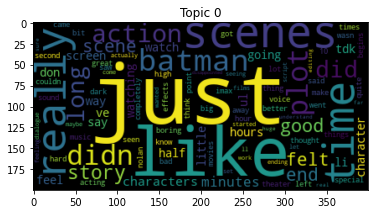

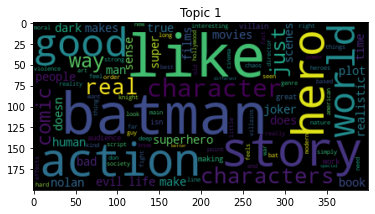

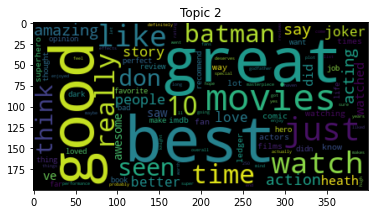

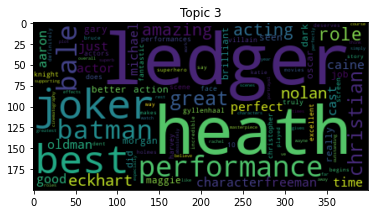

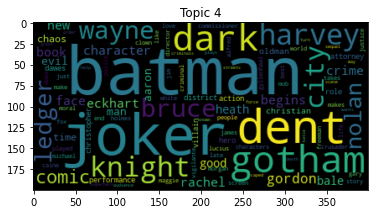

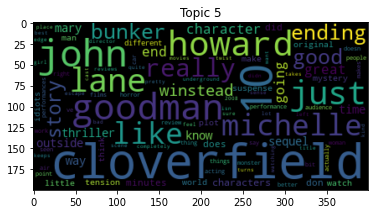

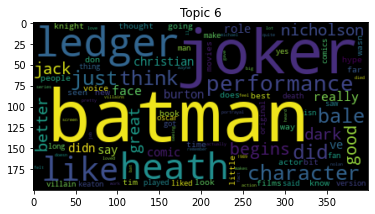

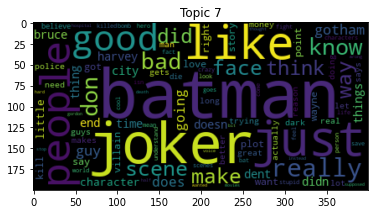

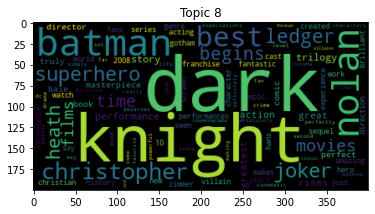

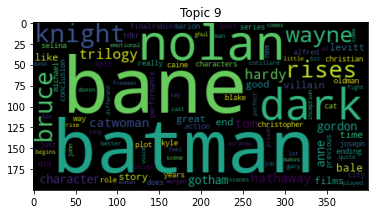

In [56]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)

# Train and Test split

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_df, test_df = train_test_split(merged_df, test_size=0.3, random_state=50)

# Print the shapes of the train and test sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (39911, 8)
Test set shape: (17105, 8)


# Naive Bayes Classifier for Sentiment Analysis

In [27]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Prepare the data
X_train = train_df['review'].values
y_train = train_df['rating_sentiment'].values

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the training data
train_predictions = nb_classifier.predict(X_train)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy:", train_accuracy)


Train Accuracy: 0.9034351431936057


# Test Accuracy

In [28]:
# Prepare the test data
X_test = test_df['review'].values
y_test = test_df['rating_sentiment'].values

# Vectorize the test data using the same vectorizer
X_test = vectorizer.transform(X_test)

# Make predictions on the test data
test_predictions = nb_classifier.predict(X_test)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.898626132709734


# Testing a sample review

In [32]:
# Preprocess the review text
# review = "21 was such an exciting movie to just sit down and watch. The whole entire movie was very intense. Especially the last 10 minutes of this, it really keeps you on the edge of your seat. This movie had some great twists that you do not see coming at all. Especially one of the twists at the end that you will be shocked from. I loved the main actors role in this movie. I thought that Jim Sturgess did such an amazing job playing the main role. He had a whole lot of stuff going through his mind in this movie the whole time. I thought that if they tried they would not have of found a better actor to play his role. Kevin Spacey also handed in a great performance as well. Kate Bosworth was looking very hot, and also did a great job. I loved how this movie was really based on a true story. I always find movies that are based on true stories good. This one was especially good though. It sort of teaches you a little bit about black jack as the movie goes on. This movie is well worth your money and time. It's good this movie was 2 hours long it made all the better. The thing this movie is trying to show you is that you get a second chance. It really shows the main actor in it that you don't know how good you have it until you loose it all. The people in this movie get way ahead of themselves and want to do to much. Overall this was a great movie. It was well worth my time and I would love to see it plenty of more times. So just give this movie a chance and go see it. You will most likely enjoy it. I think that any ages above 13 would enjoy this. You will especially like this movie if you like to gamble or play cards."
review = "Before making a movie about blackjack and card counting it would have been a good idea to read some of hundreds of books on this subject available in any major bookstore. That would have prevented the creators of this movie to look like a bunch of ignorant fools totally lacking even general knowledge of the game of blackjack, card counting and casino's countermeasures. Here is why:<br/><br/>1. Nowadays blackjack is played with 4-6-8 deck shoes cut in the middle (or 2/3 at best), which makes the player's edge (if any) so small, that making any profit is mathematically possible only in the long run. It means that no matter how favourable the count is, you chances of winning a particular hand are increased by such a small percentage, that before making any profit you may be losing many hands and even suffer substantial financial losses. Only if you are ready for losing streaks in the process and patient, and if you don't make mistakes with count and basic strategy, you may be winning in the long run. Coming to Vegas for a weekend and making fortune by winning all the time is an absolute nonsense.<br/><br/>2. To prevent card counters from making money casino's security personnel do not abduct them in the middle of a crowded casino, torture them in the back office and take away their winnings - casinos simply ban card counters. Casinos in the US are legally private clubs: they don't charge admission fee and it's up to them to decide who will be allowed to enter the club. Since card counting is not illegal (it's just a skill), nor casino security, nor law enforcement can arrest anybody for it without serious consequences like losing casino license and possibly serving jail time. Not all casinos ban card counters, but those which don't changed blackjack rules to the degree that card counting would not overcome house edge.<br/><br/>3. Besides blackjack related issues a person who keeps more than 300 grand cash in his dorm room can only be seen as a complete idiot. Obviously depositing this money in a bank account in the US could have caused problems with IRS, money laundering regulations, etc., but renting a bank safe deposit box could have solved the problem altogether. The image of a brilliant MIT student acting like a retard doesn't make any sense and makes me question the intellectual level of the screenplay writers.<br/><br/>Conclusion: stay away from this movie - don't degrade yourself by watching it."
# Vectorize the preprocessed review text
vectorized_review = vectorizer.transform([review])

# Make sentiment prediction
sentiment_prediction = nb_classifier.predict(vectorized_review)

# Print the predicted sentiment
if sentiment_prediction == 1:
    print("Positive sentiment")
else:
    print("Negative sentiment")


Negative sentiment


# Cluster Analysis

In [61]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PZZNVD\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Preprocess the text data
preprocessed_texts = []
for entry in data_list:
    review = entry[6] 
    processed_review = " ".join(word for word in nltk.word_tokenize(review) if word.lower() not in nltk.corpus.stopwords.words("english"))
    preprocessed_texts.append(processed_review)

# Vectorize the preprocessed text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

# Apply K-means clustering
num_clusters = 5  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Get the cluster labels for each review
cluster_labels = kmeans.labels_

# Print the cluster labels for each review
for i, entry in enumerate(data_list):
    review = entry[6]  # Index 6 corresponds to the 'review' column
    print(f"Review: {review} - Cluster: {cluster_labels[i]}")
